Authors:
<br />
Arsh Lalani, Faculty of Engineering, Western University 
<br />
Andrew Harrop, Faculty of Engineering, Western University

External Libraries:

In [1]:
from sklearn.model_selection import train_test_split

Internal Libraries:

In [2]:
# Internal libraries:
from load_images import load_images

from preprocessing import normalize_dataset
from preprocessing import multiple_dataset_conversion

from plotting import plot_image_classes
from plotting import plot_cnn_history

from Models.base_cnn import build_cnn
from Models.base_cnn import train_cnn


Load images from the dataset

In [3]:
dataset_1_tumor_images, dataset_1_normal_images = load_images(1)
dataset_2_tumor_images, dataset_2_normal_images = load_images(2)

Plot random images:

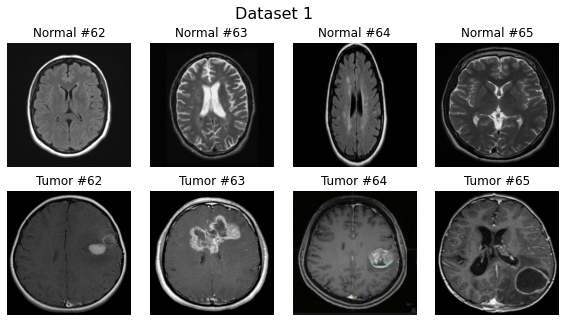

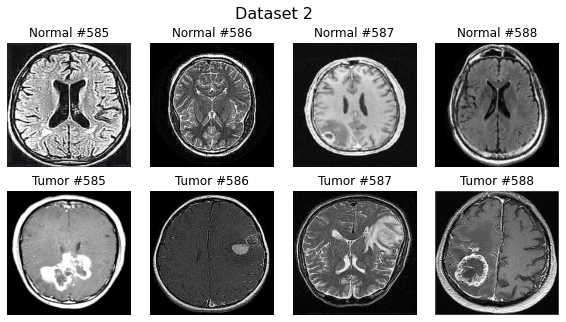

In [4]:
plot_image_classes(dataset_1_normal_images, dataset_1_tumor_images, n_images=4, title="Dataset 1")
plot_image_classes(dataset_2_normal_images, dataset_2_tumor_images, n_images=4, title="Dataset 2")

Generic Preprocessing:

In [5]:
X, Y = multiple_dataset_conversion(yes=[dataset_1_tumor_images], no=[dataset_1_normal_images])
X, Y = normalize_dataset(X, Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.9, random_state=42, stratify=Y)

Basic CNN Model creation

In [8]:
base_cnn = build_cnn()
base_cnn_history, base_cnn_accuracy = train_cnn(base_cnn, X_train, Y_train, X_test, Y_test, epochs=50)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

/Users/andrew/Desktop/School/CS4442/Final/CodingEnv/Advanced-AI-Thesis/Models/base_cnn.py:78: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator.flow(train_X, train_Y, batch_size=batch_size),


3/3 [==============================] - 67s 30s/step - loss: 44.3814 - accuracy: 0.5294 - val_loss: 1.0990 - val_accuracy: 0.3860
Epoch 2/50
3/3 [==============================] - 18s 6s/step - loss: 1.1920 - accuracy: 0.5000
Epoch 3/50
3/3 [==============================] - 17s 6s/step - loss: 1.1073 - accuracy: 0.5417
Epoch 4/50
3/3 [==============================] - 13s 3s/step - loss: 0.8814 - accuracy: 0.4118
Epoch 5/50
3/3 [==============================] - 13s 3s/step - loss: 0.8225 - accuracy: 0.3529
Epoch 6/50
3/3 [==============================] - 12s 3s/step - loss: 0.6958 - accuracy: 0.5882
Epoch 7/50
3/3 [==============================] - 17s 6s/step - loss: 0.7630 - accuracy: 0.6250
Epoch 8/50
3/3 [==============================] - 17s 6s/step - loss: 0.7334 - accuracy: 0.4583
Epoch 9/50
3/3 [==============================] - 12s 3s/step - loss: 0.6921 - accuracy: 0.5882
Epoch 10/50
3/3 [==============================] - 12s 6s/step - loss: 0.8520 - accuracy: 0.6471
Epoch 

/Users/andrew/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/andrew/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/andrew/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

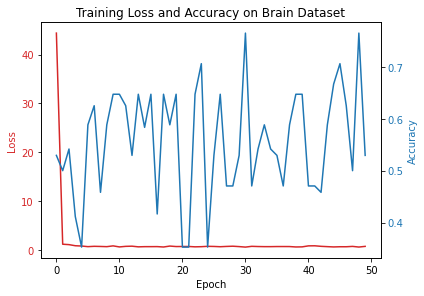

In [9]:
plot_cnn_history(base_cnn_history)